In [5]:
def load_data():
    import numpy as np
    import os
    from keras.datasets.cifar import load_batch
    from keras import backend
    path = "/kaggle/input/cifar10-python/cifar-10-batches-py"
    num_train_samples = 50000

    x_train = np.empty((num_train_samples, 3, 32, 32), dtype="uint8")
    y_train = np.empty((num_train_samples,), dtype="uint8")

    for i in range(1, 6):
        fpath = os.path.join(path, "data_batch_" + str(i))
        (
            x_train[(i - 1) * 10000 : i * 10000, :, :, :],
            y_train[(i - 1) * 10000 : i * 10000],
        ) = load_batch(fpath)

    fpath = os.path.join(path, "test_batch")
    x_test, y_test = load_batch(fpath)

    y_train = np.reshape(y_train, (len(y_train), 1))
    y_test = np.reshape(y_test, (len(y_test), 1))

    if backend.image_data_format() == "channels_last":
        x_train = x_train.transpose(0, 2, 3, 1)
        x_test = x_test.transpose(0, 2, 3, 1)

    x_test = x_test.astype(x_train.dtype)
    y_test = y_test.astype(y_train.dtype)

    return (x_train, y_train), (x_test, y_test)

In [6]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import keras.utils as np_ut
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D,Input,BatchNormalization,Dropout
from keras.datasets import cifar10
# (x_train,y_train),(x_test,y_test)=cifar10.load_data()

# 使用本地下载的cifar10数据
(x_train,y_train),(x_test,y_test)=load_data()

# 标准化
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 标签
y_train_OneHot = np_ut.to_categorical(y_train,10)
y_test_OneHot = np_ut.to_categorical(y_test,10)

model = Sequential()
model.add(Input(x_train.shape[1:]))

model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()
model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])
# history = model.fit(x_train, y_train_OneHot,     #自然训练
#                     epochs=20,
#                     validation_split=0.2,
#                     shuffle=True)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [7]:
# score = model.evaluate(x_test, y_test_OneHot,
#                        verbose=1)
# print("评估分数",score)
# def show_train(tran_his,train,validation):
#     plt.plot(tran_his.history[train])
#     plt.plot(tran_his.history[validation])
#     plt.ylabel(train)
#     plt.xlabel("Epoch")
#     plt.legend([train,validation],loc='upper left')
#     plt.show()
# show_train(history,'accuracy','val_accuracy')
# show_train(history,'loss','val_loss')

In [8]:
# 在随机使用图像生成器重新训练
train_gen=ImageDataGenerator(width_shift_range=0.1, #随机宽度偏移量
                             height_shift_range=0.1, #随机高度偏移量
                             horizontal_flip=True,# 随机水平旋转
                             rotation_range=15#随机角度偏转度数
                            )
ge_train = train_gen.flow(x_train,y_train_OneHot)
history=model.fit_generator(ge_train,
                    epochs=100,
                    steps_per_epoch=int(x_train.shape[0] / 64),
                    validation_data=(x_test,y_test_OneHot))

Epoch 1/100


/tmp/ipykernel_28/1873181954.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(ge_train,
2023-06-29 01:43:21.607144: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


781/781 [==============================] - 27s 24ms/step - loss: 1.9690 - accuracy: 0.3468 - val_loss: 1.5786 - val_accuracy: 0.4381
Epoch 2/100
781/781 [==============================] - 19s 24ms/step - loss: 1.4075 - accuracy: 0.4952 - val_loss: 1.4002 - val_accuracy: 0.5205
Epoch 3/100
781/781 [==============================] - 18s 23ms/step - loss: 1.2206 - accuracy: 0.5672 - val_loss: 1.1391 - val_accuracy: 0.6171
Epoch 4/100
781/781 [==============================] - 19s 24ms/step - loss: 1.1077 - accuracy: 0.6109 - val_loss: 1.0413 - val_accuracy: 0.6410
Epoch 5/100
781/781 [==============================] - 18s 23ms/step - loss: 1.0281 - accuracy: 0.6388 - val_loss: 1.0932 - val_accuracy: 0.6200
Epoch 6/100
781/781 [==============================] - 18s 23ms/step - loss: 0.9702 - accuracy: 0.6645 - val_loss: 0.9544 - val_accuracy: 0.6620
Epoch 7/100
781/781 [==============================] - 18s 23ms/step - loss: 0.9027 - accuracy: 0.6905 - val_loss: 1.0302 - val_accuracy: 0.66

313/313 [==============================] - 1s 4ms/step - loss: 0.3578 - accuracy: 0.8811
评估分数 [0.35775071382522583, 0.8810999989509583]


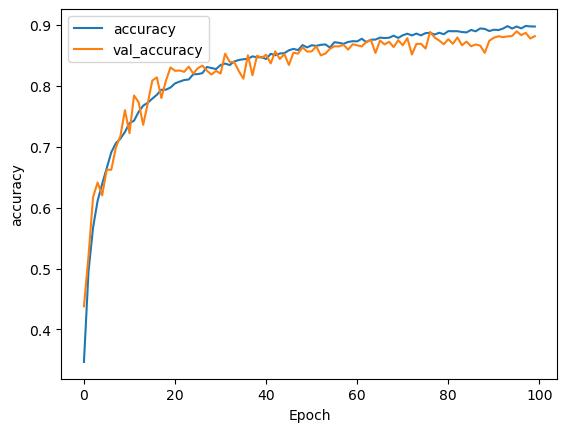

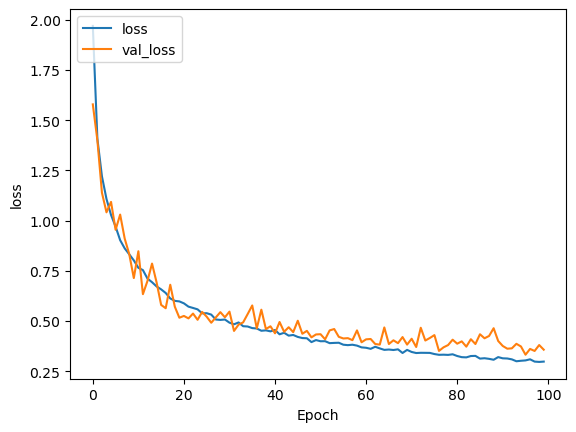

In [9]:
#查看使用了图像生成器后的效果

score = model.evaluate(x_test, y_test_OneHot,
                       verbose=1)
print("评估分数",score)
def show_train(tran_his,train,validation):
    plt.plot(tran_his.history[train])
    plt.plot(tran_his.history[validation])
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend([train,validation],loc='upper left')
    plt.show()
show_train(history,'accuracy','val_accuracy')
show_train(history,'loss','val_loss')